# 9-2

Bombillas donde duración está distribuida de forma aproximadamente normal y $\sigma = 40$ horas. En una muestra de 30 bombillas tiene una duración promedio de 78 horas. Calcular intervalo de confianza del 96% para la media de la población.

- $\sigma = 40$
- $\mu = 780$



Aquí hay un ejemplo super relevante de una función en Python que calcula intervalos de confianza

In [1]:
import statistics

def confidence_interval_old(data, confidence=0.95):
  dist = statistics.NormalDist.from_samples(data)
  z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

Creates a NormalDist object from the data sample (NormalDist.from_samples(data), which gives us access to the sample's mean and standard deviation via NormalDist.mean and NormalDist.stdev.

Compute the Z-score based on the standard normal distribution (represented by NormalDist()) for the given confidence using the inverse of the cumulative distribution function (inv_cdf).

Produces the confidence interval based on the sample's standard deviation and mean.

$$\large \hat \theta_L = \bar x - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$ y $$\large \hat \theta_U = \bar x + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

Haremos uso de la nueva version de Python, que incluye de manera nativa el módulo statistics. Específicamente la clase statistics.NormalDist y el método inv_cdf.

- inv_cdf(p)
  Compute the inverse cumulative distribution function, also known as the quantile function or the percent-point function. Mathematically, it is written x : P(X <= x) = p. Finds the value x of the random variable X such that the probability of the variable being less than or equal to that value equals the given probability p.

In [2]:
dist=statistics.NormalDist(mu=780, sigma=40)
dist

NormalDist(mu=780.0, sigma=40.0)

Tenemos instanciada nuestra distribución. Ahora devemos encontrar Z usando el inverso de la función de distribución. En nuestro caso nos intersa el 96% de intervalo de confianza, por lo que queremos encontrar inv_cdf(p):

$$ x : P(X <= x)=p$$

En nuestro caso p será igual a 

$$\frac{1+.96}{2} = 0.98 = 1 - \alpha/2$$

Es decir el valor $x$ de $X$ tal que la probabilidad de que $X <= x$ sea de 0.98 (Es decir 2% antes de llegar a cien, ya que tenemos dos colas en nuestra distribución) 

In [3]:
z = statistics.NormalDist().inv_cdf((1+.96) / 2.)
z

2.053748910631822

Vamos a mejorar la funcion que encontramos, dando la opcion de pasar una distribucion ya instanciada y ajustándolo a nuestra definición de $1/\sqrt(n)$ 

In [4]:
import typing


def confidence_interval(
    data: typing.Iterable = None,
    confidence: float = 0.95,
    dist: statistics.NormalDist = None,
    n: int = None,
):
    """Calculate confidence intervals with or without instanciated distributions"""
    if data is not None:
        dist = statistics.NormalDist.from_samples(data)
        z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.0)
        h = dist.stdev * z / ((len(data)) ** 0.5)
        return dist.mean - h, dist.mean + h
    else:
        z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.0)
        h = dist.stdev * z / ((n) ** 0.5)
        return dist.mean - h, dist.mean + h


In [5]:
confidence_interval(confidence=0.96,dist=dist,n=30)

(765.0015385892706, 794.9984614107294)

Es decir:

 $$ 765.0015 < \mu <794.998 $$
 
 con 96% de confianza 

# 9.3
 
Calcular un intevalo de confianza del 95% dado:
$$\sigma = 0.0015$$
$$n=75$$
$$\mu = 0.310$$

Tomando en cuenta que ya tenemos una función creada en el inciso anterior, podemos simplemente utilizarla para obtener el intevalo de confianza

In [6]:
dist=statistics.NormalDist(mu=0.310, sigma=0.0015)
dist

NormalDist(mu=0.31, sigma=0.0015)

In [7]:
confidence_interval(confidence=0.95,dist=dist,n=75)

(0.30966052427977714, 0.31033947572022286)

Es decir:

 $$ 0.30966 < \mu < 0.3103 $$
 
 con 95% de confianza 

# 9.6 

¿Qué tan grande debe ser la muestra en el ejercicio 9.2 si deseamos tener un 96% de confianza en que nuestra media muestral estará dentro de 10 horas a partir de la media verdadera?

$$n = \Big(\frac{z_{\alpha/2} \sigma}{e}\Big)^2 $$

Recordande que 

- $\sigma = 40$
- $\mu = 780$

Primeramente calcularemos nuevamente $z_{\alpha/2}$

In [8]:
z = statistics.NormalDist().inv_cdf((1+.96) / 2.)
z

2.053748910631822

In [9]:
n = (z*40 / 10)**2
n

67.48615340674233

Redondeando, obtenemos la respuesta de $n=68$

# 9.7

Similar al ejercicio anterior, tenemos ahora que $e=0.0005$ con una confianza del 95%

Primeramente calcularemos nuevamente $z_{\alpha/2}$

$$\sigma = 0.0015$$
$$n=75$$
$$\mu = 0.310$$

In [10]:
z = statistics.NormalDist().inv_cdf((1+.95) / 2.)
z

1.9599639845400536

In [11]:
n = (z*0.0015/0.0005)**2
n

34.57312938624712

Por lo que al redondear, tenemos la respuesta $n=35$

# 9.14



In [12]:
import pandas as pd
df=pd.read_csv("914.csv")
df

,data
0,3.4
1,2.5
2,4.8
3,2.9
4,3.6
5,2.8
6,3.3
7,5.6
8,3.7
9,2.8


In [13]:
df.describe()

,data
count,15.000000
mean,3.786667
std,0.970910
min,2.500000
25%,2.950000
50%,3.600000
75%,4.600000
max,5.600000


In [14]:
n = len(df["data"])
x = df.describe()["data"]["mean"]
s = df.describe()["data"]["std"]

In [15]:
# Para muestras pequenas utilizamos la estadistica t
# n = 15, grados de livertad= 15-1 = 14
# for 95% confidence interval, alpha = 1% = 0.01 and alpha/2 = 0.005
from scipy import stats

ci = 95
n = 15
t = stats.t.ppf(1- ((100-ci)/2/100), n-1) # 95%
print(t) # 2.14

2.1447866879169273


$$\large \hat \theta_L = \bar x - t_{\alpha/2}\frac{s}{\sqrt{n}}$$ y $$\large \hat \theta_U = \bar x + t_{\alpha/2}\frac{s}{\sqrt{n}}$$

Con s = 0.97 $$t_{0.025}=2.14$$
$$\bar x=3.78666$$ y $$n=15$

In [16]:
h=(t)*((s)/(n)**.5)
(x + -h,x+h)

(3.248994505072706, 4.324338828260627)

## La respuesta es

$$(3.2450, 4.3282)$$

## Si por un momento suponemos que podemos usar z, y conocieramos sigma, obtendriamos los intervalos de confianza que vienen abajo, lo cual vemos que son menos anchos

In [17]:
confidence_interval(data=df["data"],confidence=0.95)

(3.295327328283576, 4.278006005049757)

# 9.41

Calcule un intervalo de conifanza del 99% para la diferencia
μ2 – μ1 en los tiempos medios de recuperación
para los dos medicamentos. Suponga poblaciones normales
que tienen varianzas iguales.

In [40]:
x1=17
x2=19
s1_cuad=1.5
s2_cuad=1.8
n1=14
n2=16
confidence = 99
grados = 28
n = 15
t = stats.t.ppf(1- ((100-confidence)/2/100), grados) 
t

2.763262455461066

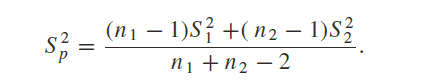

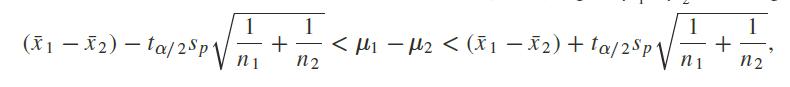

Usando la fórmula de arriba obtenemos


In [41]:
sp = (((n1-1)*s1_cuad + (n2-1)*s2_cuad) / (n1+n2-2))**.5
h=((t*sp)*(((1)/(n1))+((1)/(n2)))**.5)
h

1.3031854284107456

In [43]:
(x2-x1)-h

0.6968145715892544

In [44]:
(x2-x1)+h

3.3031854284107456

Con lo que obtenemos los intervalos $0.6968 < \mu_1 -\mu_2 < 3.3031$ 

# 9.44

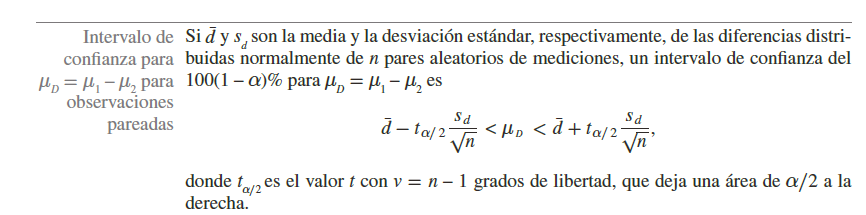

In [67]:
data=[34400-36700,
    45500-46800,
    36700-37700,
    32000-31100,
    48400-47800,
    32800-36400,
    38100-38900,
    30100-31500]



In [68]:
dist = statistics.NormalDist.from_samples(data)

In [69]:
confidence = 99
grados = 7
t = stats.t.ppf(1- ((100-confidence)/2/100), grados) 
t

3.4994832973505026

In [70]:
dist.mean

-1112.5

In [71]:
dist.stdev

1454.4881279287617

In [72]:
dist.mean - t*((dist.stdev)/(8)**.5)

-2912.0715234621966

In [73]:
dist.mean + t*((dist.stdev)/(8)**.5)

687.0715234621969

$$-2912.0715234621966 <\mu_D  < 687.0715234621969$$

# 9.46

Empresa Tiempo (minutos)
I 103 94 110 87 98
II 97 82 123 92 175 88 118

In [82]:
dI = [103, 94, 110, 87 ,98]
distI = statistics.NormalDist.from_samples(dI)
print(distI.mean)
print(distI.stdev)

98.4
8.734987120768983


In [85]:
dII = [97, 82, 123, 92, 175, 88, 118]
distII = statistics.NormalDist.from_samples(dII)
print(distII.mean)
print(distII.stdev)

110.71428571428571
32.18547439303578


In [84]:
n1 = len(dI)
n2 = len(dII)


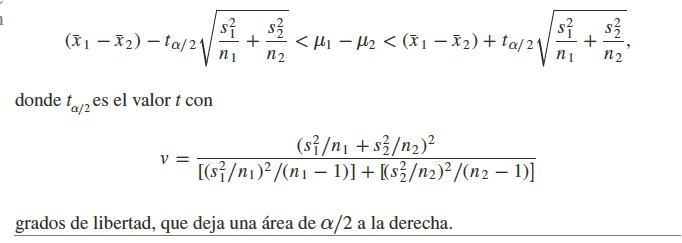

In [89]:
v = (distI.stdev**2/n1+distII.stdev**2/n2)**2/(((distI.stdev**2/n1)**2)/(n1-1)+((distII.stdev**2/n2)**2)/(n2-1))
round(v)

7

In [90]:
confidence = 90
grados = 7
t = stats.t.ppf(1- ((100-confidence)/2/100), grados) 
t

1.894578605061305

In [95]:
distII.mean-distI.mean-t*((distI.stdev**2/n1)+(distII.stdev**2/n2))**.5

-11.89234962275555

In [96]:
distII.mean-distI.mean+t*((distI.stdev**2/n1)+(distII.stdev**2/n2))**.5

36.52092105132695

Por lo tanto tendremos que $$-11.89 < \mu_A - \mu_B < 36.52$$

# 3.51

En una muestra aleatoria de 1000 viviendas en
cierta ciudad se encuentra que 228 utilizan petróleo
como combustible para la calefacción. Calcule intervalos
de coni anza del 99% para la proporción de viviendas
en esta ciudad que utilizan petróleo con el i n
mencionado. Utilice los dos métodos que se presentaron
en la página 297.

In [131]:
p = 228/1000
q = 772/1000
z = statistics.NormalDist().inv_cdf((1 + .99) / 2.0)
n=1000
print("p",p,"q",q,"z",z)

p 0.228 q 0.772 z 2.5758293035489


### Método 2

In [132]:
( ((p )+(z**2 /(2*n) )) / ((1)+(z**2/n)) )-  ((z) / ((1)+(z**2/n)) ) * ( ((p*q/n)+(z**2/(4*n**2))) )**.5

0.19568466582611407

In [133]:
( ((p )+(z**2 /(2*n) )) / ((1)+(z**2/n)) )+  ((z) / ((1)+(z**2/n)) ) * ( ((p*q/n)+(z**2/(4*n**2))) )**.5

0.26390092788133923

### Método 1

In [134]:
p-z*((p*q/n)**.5)

0.1938262094562902

In [135]:
p+z*((p*q/n)**.5)

0.2621737905437098

## Por lo tanto  

$$ 0.1938<p<0.2621$$

# 9.54

Un fabricante de reproductores de MP3 utiliza
un conjunto de pruebas exhaustivas para evaluar el funcionamiento
eléctrico de su producto. Todos los reproductores
de MP3 deben pasar todas las pruebas antes
de ser puestos a la venta. De una muestra aleatoria de
500 reproductores, 15 no pasan una o más de las pruebas.
Calcule un intervalo de coni anza del 90% para la
proporción de los reproductores de MP3 de la población
que pasan todas las pruebas.

In [136]:
n = 500
p = 485/500
q = 15/500
z = statistics.NormalDist().inv_cdf((1 + .90) / 2.0)



In [137]:
p-z*((p*q/n)**.5)

0.9574515885854681

In [138]:
p+z*((p*q/n)**.5)

0.9825484114145319

Por lo tanto tendremos que $$0.9574 < p < 0.9825$$


# 9.58

En el artículo del periódico al que se hace referencia
en el ejercicio 9.57, 32% de los 1600 adultos
encuestados dijo que el programa espacial estadounidense
debería enfatizar la exploración cientíi ca. ¿Qué
tamaño debería tener una muestra de adultos para la
encuesta si se desea tener un 95% de coni anza en que
el porcentaje estimado esté dentro del 2% del porcentaje
verdadero?

$$n = \frac{z_{\alpha/2}^2 \hat p \hat q}{e^2} $$

In [146]:
z = statistics.NormalDist().inv_cdf((1 + .95) / 2.0)
p = .32
q = 1-.32
e = 0.02
print(z,p,q,e)

1.9599639845400536 0.32 0.6799999999999999 0.02


In [147]:
((z**2)*p*q)/(e**2)

2089.753598457603

## 2090 al redondear

# 9.70 

In [150]:
n = 20
print(n*.337,n*.362)

6.74 7.24


Aproximadamente 7 mujeres

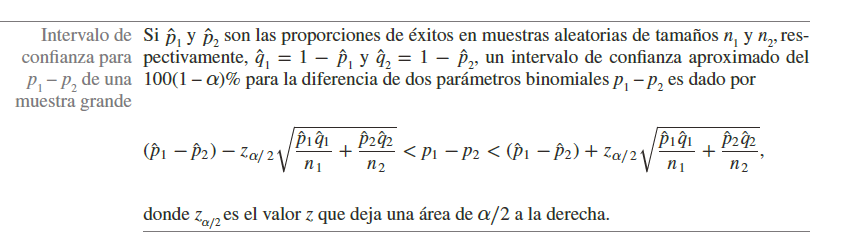

In [157]:
p1 = .337
q1 = 1 - p1
p2 = .362
q2 = 1 - p2
n1 = 20
n2 = 20
z = statistics.NormalDist().inv_cdf((1 + .95) / 2.0)

In [159]:
(p1 - p2) - z*((p1*q1)/(n1)+(p2*q2)/(n2))**.5

-0.32042418224975594

In [162]:
(p1 - p2) + z*((p1*q1)/(n1)+(p2*q2)/(n2))**.5

0.270424182249756

Como el intervalo contiene al cero, no hay evidencia de un cambio en la proporcion